In [1]:
#Import Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sgt import SGT
import os 

# Training Experience: 10-11 months: Subjects 1,3,5,6

## Top Con - No Bias Boxes

### Healthy

In [2]:
#Read Corpus
path13 = 'TOP_CON/Healthy/Healthy(1,3)/'
path5 = 'TOP_CON/Healthy/Healthy(5)/'
path6 = 'TOP_CON/Healthy/Healthy(6)/'
paths = [path13,path5, path6]


def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_healthy = pd.concat(load_files(paths))


In [3]:
def equal_boxes(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.25 > i and 0<j and 0.25 > j: 
            arr.append('A')
        elif 0.25<i and 0.5 > i and 0<j and 0.25 > j: 
            arr.append('B')
        elif 0.5<i and 0.75 > i and 0<j and 0.25 > j: 
            arr.append('C')
        elif 0.75<i and 1 > i and 0<j and 0.25 > j: 
            arr.append('D')
        elif 0<i and 0.25 > i and 0.25<j and 0.5 > j: 
            arr.append('E')
        elif 0.25<i and 0.5 > i and 0.25<j and 0.5 > j: 
            arr.append('F')
        elif 0.5<i and 0.75 > i and 0.25<j and 0.5 > j: 
            arr.append('G')
        elif 0.75<i and 1 > i and 0.25<j and 0.5 > j: 
            arr.append('H')
        elif 0<i and 0.25 > i and 0.5<j and 0.75 > j: 
            arr.append('I')
        elif 0.25<i and 0.5 > i and 0.5<j and 0.75 > j: 
            arr.append('J')
        elif 0.5<i and 0.75 > i and 0.5<j and 0.75 > j: 
            arr.append('K')
        elif 0.75<i and 1 > i and 0.5<j and 0.75 > j: 
            arr.append('L')
        elif 0<i and 0.25 > i and 0.75<j and 1 > j: 
            arr.append('M')
        elif 0.25<i and 0.5 > i and 0.75<j and 1 > j: 
            arr.append('N')
        elif 0.5<i and 0.75 > i and 0.75<j and 1 > j: 
            arr.append('O')
        elif 0.75<i and 1 > i and 0.75<j and 1 > j: 
            arr.append('P')
        else: 
            arr.append('error')
    return arr

x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = equal_boxes(x,y)

In [4]:
def make_corpus(corpus_new):
    A = np.array(corpus_new.fixation_id[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id[corpus_new.letters=='G'])
    H = np.array(corpus_new.fixation_id[corpus_new.letters=='H'])
    I = np.array(corpus_new.fixation_id[corpus_new.letters=='I'])
    J = np.array(corpus_new.fixation_id[corpus_new.letters=='J'])
    K = np.array(corpus_new.fixation_id[corpus_new.letters=='K'])
    L = np.array(corpus_new.fixation_id[corpus_new.letters=='L'])
    M = np.array(corpus_new.fixation_id[corpus_new.letters=='M'])
    N = np.array(corpus_new.fixation_id[corpus_new.letters=='N'])
    O = np.array(corpus_new.fixation_id[corpus_new.letters=='O'])
    P = np.array(corpus_new.fixation_id[corpus_new.letters=='P'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G], 
                           [8, H], 
                           [9, I], 
                           [10, J],
                           [11, K], 
                           [12, L], 
                           [13, M], 
                           [14, N],
                           [15, O], 
                           [16, P]], 
                          columns=['id', 'sequence'])
    return corpus

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)

In [5]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [6]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


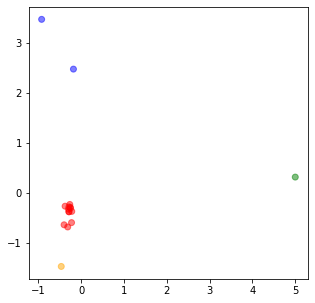

In [7]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [8]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.284981,-0.283039,red
1,-0.922263,3.463632,blue
2,-0.283952,-0.379511,red
3,-0.223544,-0.597281,red
4,-0.264394,-0.234446,red
5,-0.179106,2.469520,blue
6,-0.373957,-0.269257,red
7,-0.463630,-1.472998,orange
8,-0.246270,-0.310038,red
9,-0.397993,-0.640895,red


### Glaucoma

In [9]:
#Read Corpus
path13 = 'TOP_CON/Glaucoma/Glaucoma(1,3)/'
path5 = 'TOP_CON/Glaucoma/Glaucoma(5)/'
path6 = 'TOP_CON/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]


def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_diseased = pd.concat(load_files(paths))



In [10]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)

In [11]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [12]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


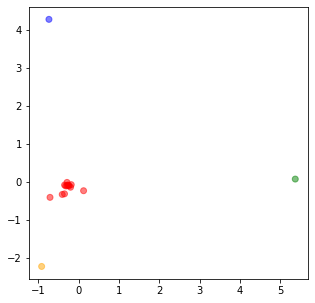

In [13]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [14]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.320016,-0.109473,red
1,-0.735892,4.284468,blue
2,-0.708960,-0.411459,red
3,-0.917000,-2.233964,orange
4,-0.287407,-0.017270,red
5,-0.348073,-0.085570,red
6,-0.405765,-0.334162,red
7,-0.349677,-0.318473,red
8,-0.287624,-0.104883,red
9,-0.199953,-0.144157,red


## Top Con -  Bias Boxes

### Healthy

In [15]:
def bias_boxes(x,y): 
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.6 > i and 0<j and 0.6 > j: 
            arr.append('A')
        elif 0<i and 0.25 > i and 0.6<j and 1 > j: 
            arr.append('B')
        elif 0.25<i and 0.48 > i and 0.6<j and 1 > j: 
            arr.append('C')
        elif 0.48<i and 0.6 > i and 0.6<j and 1 > j: 
            arr.append('D')
        elif 0.6<i and 1 > i and 0<j and 0.6 > j: 
            arr.append('E')
        elif 0.6<i and 0.77 > i and 0.6<j and 1 > j: 
            arr.append('F')
        elif 0.77<i and 1 > i and 0.6<j and 1 > j: 
            arr.append('G')
        else: 
            arr.append('error')
            
    return arr

x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes(x,y)



In [16]:
def make_corpus_2(corpus_new): 
    A = np.array(corpus_new.fixation_id[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id[corpus_new.letters=='G'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G]], columns=['id', 'sequence'])
    return corpus

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_2(corpus_new)

In [17]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [18]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
df

0.6240794781467681


,x1,x2
0,6.675935,1.117807
1,-0.765266,-1.261729
2,-0.933172,-1.554090
3,-0.850881,-1.402128
4,-2.319233,5.877688
5,-0.633777,-1.295345
6,-1.173607,-1.482203


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


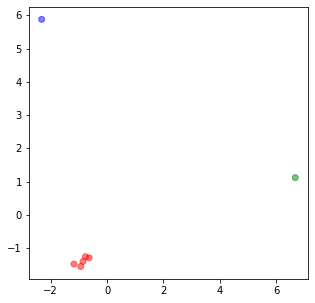

In [19]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [20]:
df['labels'] = colors
df

,x1,x2,labels
0,6.675935,1.117807,g
1,-0.765266,-1.261729,r
2,-0.933172,-1.554090,r
3,-0.850881,-1.402128,r
4,-2.319233,5.877688,b
5,-0.633777,-1.295345,r
6,-1.173607,-1.482203,r


### Glaucoma

In [21]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_2(corpus_new)

In [22]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [23]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
df

0.6899467732943863


,x1,x2
0,-5.137591,4.593944
1,-0.110498,-1.469476
2,-0.094018,-1.645393
3,-0.082849,-1.556006
4,5.638304,4.036724
5,-0.144770,-1.627288
6,-0.068579,-2.332505


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


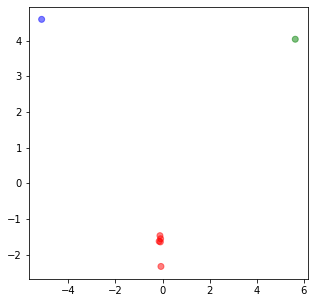

In [24]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [25]:
df['labels'] = colors
df

,x1,x2,labels
0,-5.137591,4.593944,b
1,-0.110498,-1.469476,r
2,-0.094018,-1.645393,r
3,-0.082849,-1.556006,r
4,5.638304,4.036724,g
5,-0.144770,-1.627288,r
6,-0.068579,-2.332505,r


## Zeiss - No Bias Boxes

### Healthy

In [26]:
path13 = 'Zeiss/Healthy/Healthy(3)/'
path5 = 'Zeiss/Healthy/Healthy(5)/'
path6 = 'Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_healthy = pd.concat(load_files(paths))

In [27]:
x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)
        

In [28]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,"(40, 40)","(40, 41)","(40, 42)","(40, 43)","(40, 44)","(40, 45)","(40, 46)","(40, 47)","(40, 48)","(40, 49)",...,"(1651, 1642)","(1651, 1643)","(1651, 1644)","(1651, 1645)","(1651, 1646)","(1651, 1647)","(1651, 1648)","(1651, 1649)","(1651, 1650)","(1651, 1651)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [29]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


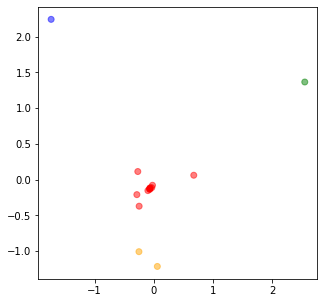

In [30]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [31]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.069503,-0.132258,r
1,-0.100112,-0.153943,r
2,-0.071075,-0.125334,r
3,-0.060744,-0.114267,r
4,-0.022772,-0.079391,r
5,-1.734839,2.242375,b
6,-0.270750,0.112941,r
7,-0.069382,-0.136738,r
8,2.549743,1.365643,g
9,-0.248192,-0.372144,r


### Glaucoma

In [62]:
path13 = 'Zeiss/Glaucoma/Glaucoma(3)/'
path5 = 'Zeiss/Glaucoma/Glaucoma(5)/'
path6 = 'Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]

def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)

corpus_diseased = pd.concat(load_files(paths))

In [63]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)
        

In [64]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,"(17, 17)","(17, 18)","(17, 25)","(17, 51)","(17, 58)","(17, 59)","(17, 60)","(17, 61)","(17, 62)","(17, 63)",...,"(1487, 1478)","(1487, 1479)","(1487, 1480)","(1487, 1481)","(1487, 1482)","(1487, 1483)","(1487, 1484)","(1487, 1485)","(1487, 1486)","(1487, 1487)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


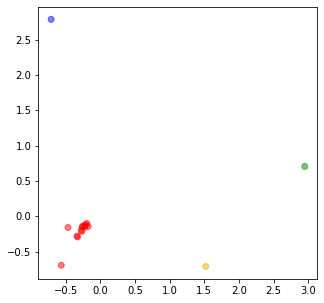

In [66]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [67]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.256447,-0.151320,r
1,-0.254981,-0.140603,r
2,-0.210877,-0.118488,r
3,-0.192799,-0.101601,r
4,-0.464977,-0.159056,r
5,-0.708384,2.786652,b
6,-0.263077,-0.212596,r
7,-0.222114,-0.151042,r
8,-0.562373,-0.693208,r
9,-0.276682,-0.198857,r


## Zeiss - Bias Boxes

### Right Side - Healthy

In [38]:
path13 = 'Zeiss/Healthy/Healthy(3)/'
path5 = 'Zeiss/Healthy/Healthy(5)/'
path6 = 'Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

left = ['8919', '9059', '8960', '9187', '9238', '8914', '8974', '8981', '9025', '9071', '9172', '8904', '8955']
right = ['9189', '8994', '8924', '9175', '8909', '9061', '9084', '9189', 'RNFL']

def load_files_left(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                if filename[-8:-4]  in left: 
                    new_path = i + filename 
                    yield pd.read_csv(new_path)
                    
def load_files_right(path): 
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                if filename[-8:-4]  in right: 
                    new_path = i + filename 
                    yield pd.read_csv(new_path)

corpus_healthy = pd.concat(load_files_right(paths))


In [39]:
def bias_boxes_zeiss_right(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.61 > i and 0<j and .275 > j: 
            arr.append('A')
        elif 0.61<i and 1 > i and 0<j and .25 > j: 
            arr.append('B')
        elif 0.61<i and 1 > i and .25<j and .5 > j: 
            arr.append('C')
        elif 0.61<i and 1 > i and 0.5<j and 1 > j: 
            arr.append('D')
        elif 0.23<i and 0.61 > i and 0.7<j and 1 > j: 
            arr.append('E')
        elif 0<i and 0.61 > i and 0.5<j and 0.7 > j: 
            arr.append('F')
        else: 
            arr.append('error')
    return arr

def bias_boxes_zeiss_left(x,y): 
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.4 > i and 0<j and .2 > j: 
            arr.append('A')
        elif 0<i and 0.4 > i and 0.2<j and .5 > j: 
            arr.append('B')
        elif 0.0<i and 0.4 > i and 0.5<j and 1 > j: 
            arr.append('C')
        elif 0.4<i and 0.8 > i and 0<j and 0.25 > j: 
            arr.append('D')
        elif 0.4<i and 1 > i and 0.5<j and 0.71 > j: 
            arr.append('E')
        elif 0.4<i and 0.8 > i and 0.71<j and 1 > j: 
            arr.append('F')
        else: 
            arr.append('error')
    return arr

def make_corpus_3(corpus_new):
    A = np.array(corpus_new.fixation_id[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id[corpus_new.letters=='F'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F]], columns=['id', 'sequence'])
    return corpus

x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes_zeiss_right(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [40]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [41]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


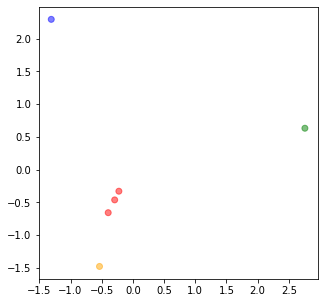

In [42]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [43]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.395911,-0.657733,r
1,-0.224765,-0.329595,r
2,-0.292103,-0.462266,r
3,-0.535247,-1.479135,orange
4,2.756618,0.632512,g
5,-1.308591,2.296217,b


### Right Side - Glaucoma

In [68]:
path13 = 'Zeiss/Glaucoma/Glaucoma(3)/'
path5 = 'Zeiss/Glaucoma/Glaucoma(5)/'
path6 = 'Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]

left = ['8919', '9059', '8960', '9187', '9238', '8914', '8974', '8981', '9025', '9071', '9172', '8904', '8955']
right = ['9189', '8994', '8924', '9175', '8909', '9061', '9084', '9189', 'RNFL']

corpus_diseased = pd.concat(load_files_right(paths))

In [69]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes_zeiss_right(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [70]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [71]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


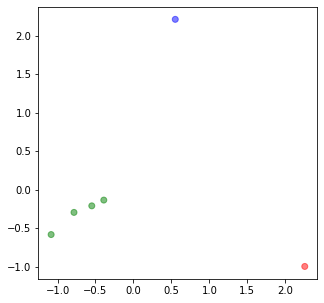

In [72]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [73]:
df['labels'] = colors
df

,x1,x2,labels
0,-1.084413,-0.581284,g
1,-0.390664,-0.133822,g
2,-0.548953,-0.208441,g
3,2.256560,-0.995286,r
4,0.550845,2.212555,b
5,-0.783374,-0.293722,g


### Left Side - Healthy

In [74]:
path13 = 'Zeiss/Healthy/Healthy(3)/'
path5 = 'Zeiss/Healthy/Healthy(5)/'
path5 = 'Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]
corpus_healthy = pd.concat(load_files_left(paths))


In [75]:
x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes_zeiss_left(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [76]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [77]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


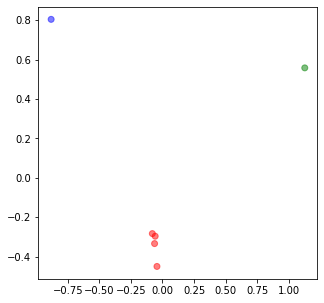

In [78]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [79]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.057929,-0.295887,r
1,-0.882211,0.803689,b
2,1.127137,0.557637,g
3,-0.080461,-0.282716,r
4,-0.062695,-0.333401,r
5,-0.043841,-0.449322,r


### Left Side - Glaucoma

In [56]:
path13 = 'Zeiss/Glaucoma/Glaucoma(3)/'
path5 = 'Zeiss/Glaucoma/Glaucoma(5)/'
path6 = 'Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]
corpus_diseased = pd.concat(load_files_left(paths))

In [57]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes_zeiss_left(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [58]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [59]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


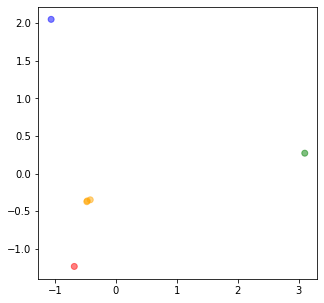

In [60]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [61]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.474633,-0.374271,orange
1,-0.680500,-1.235309,r
2,3.102227,0.271004,g
3,-0.418500,-0.349037,orange
4,-0.468053,-0.363337,orange
5,-1.060542,2.050950,b
